## Define probabilities for yellow and red ACA star catalog limits

These have historically been fixed at 10.3 and 10.6 mag, respectively.  In the era of changing CCD temperatures this no longer makes sense.

This notebook proposes uses an acquisition probability of 75% and 50% to define the yellow and red magnitude limits, respectively.  It provides a plot that shows the limit magnitudes as a function of ACA CCD temperature.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, '/home/aldcroft/git/starcheck')
from starcheck import star_probs

### Historically the 10.3 and 10.6 mag limits were not that meaningful

In [3]:
star_probs.acq_success_prob('2010:001', t_ccd=-19.7, mag=10.6)

0.82161487230908281

In [4]:
star_probs.acq_success_prob('2010:001', t_ccd=-19.7, mag=10.3)

0.91679522877574504

### Define a fiducial epoch of 2015:001 and make plots

In [5]:
def plot_mag_limit_vs_t_ccd(p_acq, color, date):
    t_ccds = np.arange(-19.7, -13, p_acq)
    mags = []
    for t_ccd in t_ccds:
        mags.append(star_probs.mag_for_p_acq(p_acq, t_ccd=t_ccd, date=date))
    plt.plot(t_ccds, mags, label='p_acq={}'.format(p_acq), color=color, lw=2)

In [6]:
def plot_yellow_red(date, p_red=0.5, p_yellow=0.75):
    plot_mag_limit_vs_t_ccd(p_red, 'r', date)
    plot_mag_limit_vs_t_ccd(p_yellow, 'g', date)
    plt.hlines([10.6, 10.3], -20, -13, linestyle='--', colors=['r', 'g'])
    plt.grid()
    plt.legend(loc='best')
    plt.xlabel('T_ccd (degC)')
    plt.ylabel('Mag limit')
    plt.title('Red and yellow mag limits for {}'.format(date));

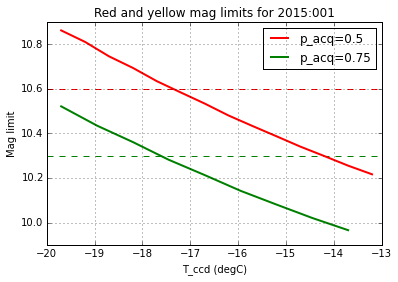

In [7]:
plot_yellow_red('2015:001')

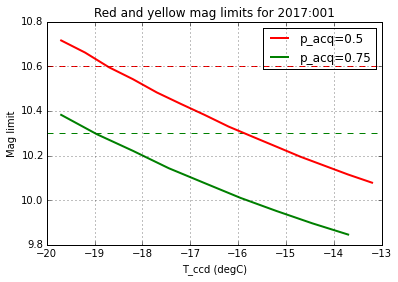

In [8]:
plot_yellow_red('2017:001')

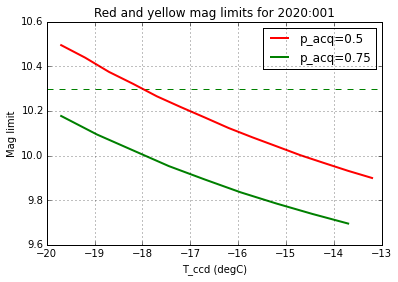

In [9]:
plot_yellow_red('2020:001')